# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    
    # If the city is unique, then add it to a our cities list
    # Also add the latitude and longitude of that city to their
    # respective lists
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_lng.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# First, make cities and lat_lngs into pd dataframe
weather_df = pd.DataFrame({
    "cities": cities, 
    "latitude": city_lat,
    "longitude": city_lng
})

# Add columns to store info 
# taken from responses to API

weather_df['temperature'] = ""
weather_df['humidity'] = ""
weather_df['cloudiness'] = ""
weather_df['Wind Speed'] = ""

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Base url for finding cities' weather
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Create params dict that contains all 
# relevant parameters (or lat and lng)
# to pass to the request. Don't forget api key

params = {
    "appid": api_key
}

row_count = 0

print("Beginning Data Retrieval")
print("------------------------------")


for index, row in weather_df.iterrows():
    city = row["cities"]
    lat = row["latitude"]
    lon = row["longitude"]
    
    
    # Add latitude and longitude parameters
    # for current row
    params['q'] = city
    
    print(f'Processing Record {row_count}: {city}. ')
    row_count += 1
    
    city_weather = requests.get(base_url, params=params).json()

    
    # Append temp, humidity, cloudiness, and wind speed
    # to the dataframe using try/except
    
    try:
        temp = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudy = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        
        weather_df.loc[index, "latitude"] = city_weather["coord"]["lat"]
        weather_df.loc[index, "longitude"] = city_weather["coord"]["lon"]
        weather_df.loc[index, "temperature"] = temp
        weather_df.loc[index, "humidity"] = humidity
        weather_df.loc[index, "cloudiness"] = cloudy
        weather_df.loc[index, "wind Speed"] = wind
        
    except:
        print("Error with data. Skipping...")
        
        weather_df.drop(labels=index, inplace=True)

Beginning Data Retrieval
------------------------------
Processing Record 0: Punta arenas. 
Processing Record 1: Muzhi. 
Processing Record 2: Grand river south east. 
Error with data. Skipping...
Processing Record 3: Bereda. 
Processing Record 4: Tsihombe. 
Error with data. Skipping...
Processing Record 5: Nantucket. 
Processing Record 6: San patricio. 
Processing Record 7: Paso de los toros. 
Processing Record 8: Alofi. 
Processing Record 9: Ponta do sol. 
Processing Record 10: Pozo de gamboa. 
Error with data. Skipping...
Processing Record 11: Jieshi. 
Processing Record 12: Hilo. 
Processing Record 13: Ushuaia. 
Processing Record 14: Pevek. 
Processing Record 15: Tumannyy. 
Error with data. Skipping...
Processing Record 16: Caracuaro. 
Processing Record 17: Batagay-alyta. 
Processing Record 18: Ossora. 
Processing Record 19: Kavaratti. 
Processing Record 20: Lompoc. 
Processing Record 21: Dikson. 
Processing Record 22: Tabas. 
Processing Record 23: Ban nahin. 
Processing Record 24: P

Processing Record 220: Gamboula. 
Processing Record 221: Ushtobe. 
Processing Record 222: Brigantine. 
Processing Record 223: Fortuna. 
Processing Record 224: Wajid. 
Processing Record 225: Attawapiskat. 
Error with data. Skipping...
Processing Record 226: Orlik. 
Processing Record 227: Kang. 
Processing Record 228: Presidente medici. 
Processing Record 229: Bethel. 
Processing Record 230: Naze. 
Processing Record 231: Roald. 
Processing Record 232: Derzhavinsk. 
Processing Record 233: Jaleswar. 
Processing Record 234: New norfolk. 
Processing Record 235: Tonj. 
Error with data. Skipping...
Processing Record 236: Inongo. 
Processing Record 237: Kungalv. 
Processing Record 238: Maniitsoq. 
Processing Record 239: Cookeville. 
Processing Record 240: Windhoek. 
Processing Record 241: Ambilobe. 
Processing Record 242: Keetmanshoop. 
Processing Record 243: Kyzyl-suu. 
Processing Record 244: Kulunda. 
Processing Record 245: Puerto escondido. 
Processing Record 246: Touros. 
Processing Record 

Processing Record 438: Port hedland. 
Processing Record 439: Santiago del estero. 
Processing Record 440: Wanning. 
Processing Record 441: Kozhevnikovo. 
Processing Record 442: Mantua. 
Processing Record 443: Bargal. 
Error with data. Skipping...
Processing Record 444: Malatya. 
Processing Record 445: Arandis. 
Processing Record 446: Nelson. 
Processing Record 447: Mergui. 
Error with data. Skipping...
Processing Record 448: Redmond. 
Processing Record 449: Muisne. 
Processing Record 450: Kruisfontein. 
Processing Record 451: Muli. 
Processing Record 452: Namatanai. 
Processing Record 453: Shiraz. 
Processing Record 454: Kualakapuas. 
Processing Record 455: Taksimo. 
Processing Record 456: Nishihara. 
Processing Record 457: Kalmunai. 
Processing Record 458: Renqiu. 
Processing Record 459: Hami. 
Processing Record 460: Sisimiut. 
Processing Record 461: Mackay. 
Processing Record 462: Acarau. 
Error with data. Skipping...
Processing Record 463: Vila praia de ancora. 
Processing Record 46

In [5]:
# Convert temperature to farhenheit
def k_to_f(temp):
    temp = (temp - 273.15) * 9/5 + 32
    return temp

weather_df["temperature"] = [k_to_f(temp) for temp in weather_df["temperature"]]

weather_df.head()

,cities,latitude,longitude,temperature,humidity,cloudiness,Wind Speed,wind Speed
0,Punta arenas,-53.16,-70.91,32.468,74,40,,5.10
1,Muzhi,65.40,64.70,44.150,81,99,,3.48
3,Bereda,43.27,-7.54,63.896,88,75,,1.50
5,Nantucket,41.28,-70.10,54.536,93,1,,2.10
6,San patricio,-26.98,-56.83,59.810,96,67,,2.40


In [6]:
weather_df.to_csv('weather_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

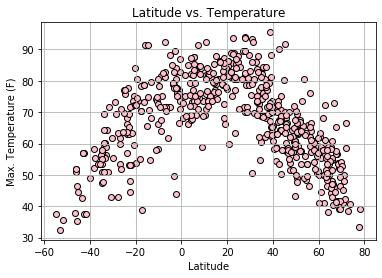

In [7]:
# Build a scatter plot for each weather type
plt.scatter(weather_df["latitude"], weather_df["temperature"], marker="o", c="pink", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./LatvsTemperature.png")

In [8]:
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

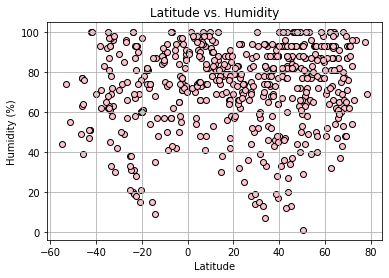

In [9]:
# Build a scatter plot for each weather type
plt.scatter(weather_df["latitude"], weather_df["humidity"], marker="o", c="pink", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./LatvsHumidity.png")

In [10]:
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

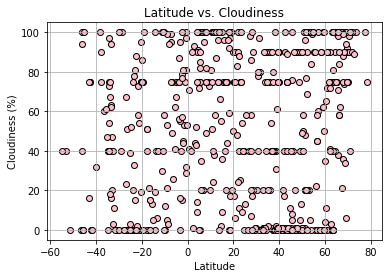

In [11]:
# Build a scatter plot for each weather type
plt.scatter(weather_df["latitude"], weather_df["cloudiness"], marker="o", c="pink", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./LatvsCloudiness.png")

In [12]:
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [13]:
# Build a scatter plot for each weather type
plt.scatter(weather_df["latitude"], weather_df["wind speed"], marker="o", c="pink", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./LatvsWind.png")

KeyError: 'wind speed'

In [ ]:
# Show plot
plt.show()